In [1]:
## 畫圖前置
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import requests
from pprint import pprint 
import re
import seaborn as sns

url = "https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_"
response = requests.get(url)
if response.status_code == 200:
    with open("TaipeiSansTCBeta-Regular.ttf", "wb") as file:
        file.write(response.content)
else:
    print("Download failed. Status code:", response.status_code)
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

list_3 = ["0","沙崙海水浴場","櫻花道","淡水漁人碼頭長堤","滬尾砲台公園","淡水捷運公園","淡水福佑宮","馬偕上岸處"]
for i, site3 in enumerate(list_3):
    if i == 0: 
        continue
    data = pd.read_csv(f"/Users/chriskeng/Documents/112課程/資科導/期末專案/text_comment/All/{site3}.csv")
    globals()[f"{list_3[i]}_df"] = pd.DataFrame(data)


In [2]:
#list_3 = ["0","沙崙海水浴場","櫻花道","淡水漁人碼頭長堤","滬尾砲台公園","淡水捷運公園","淡水福佑宮","馬偕上岸處"]
groups = 櫻花道_df.groupby(by='時間')
print(groups.size())
# 櫻花道最末筆資料為9年前

時間
1 個月前       4
1 年前      110
10 個月前     21
11 個月前      2
2 年前      155
3 個月前       4
3 年前      117
3 週前        1
4 個月前       4
4 年前      191
5 個月前       3
5 年前       39
6 個月前       5
6 年前       28
7 個月前       6
7 年前        7
8 個月前       7
8 年前        2
9 個月前      29
9 年前        1
dtype: int64


/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

WordCloud saved at: /Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/折線圖-大於四年-1.jpg


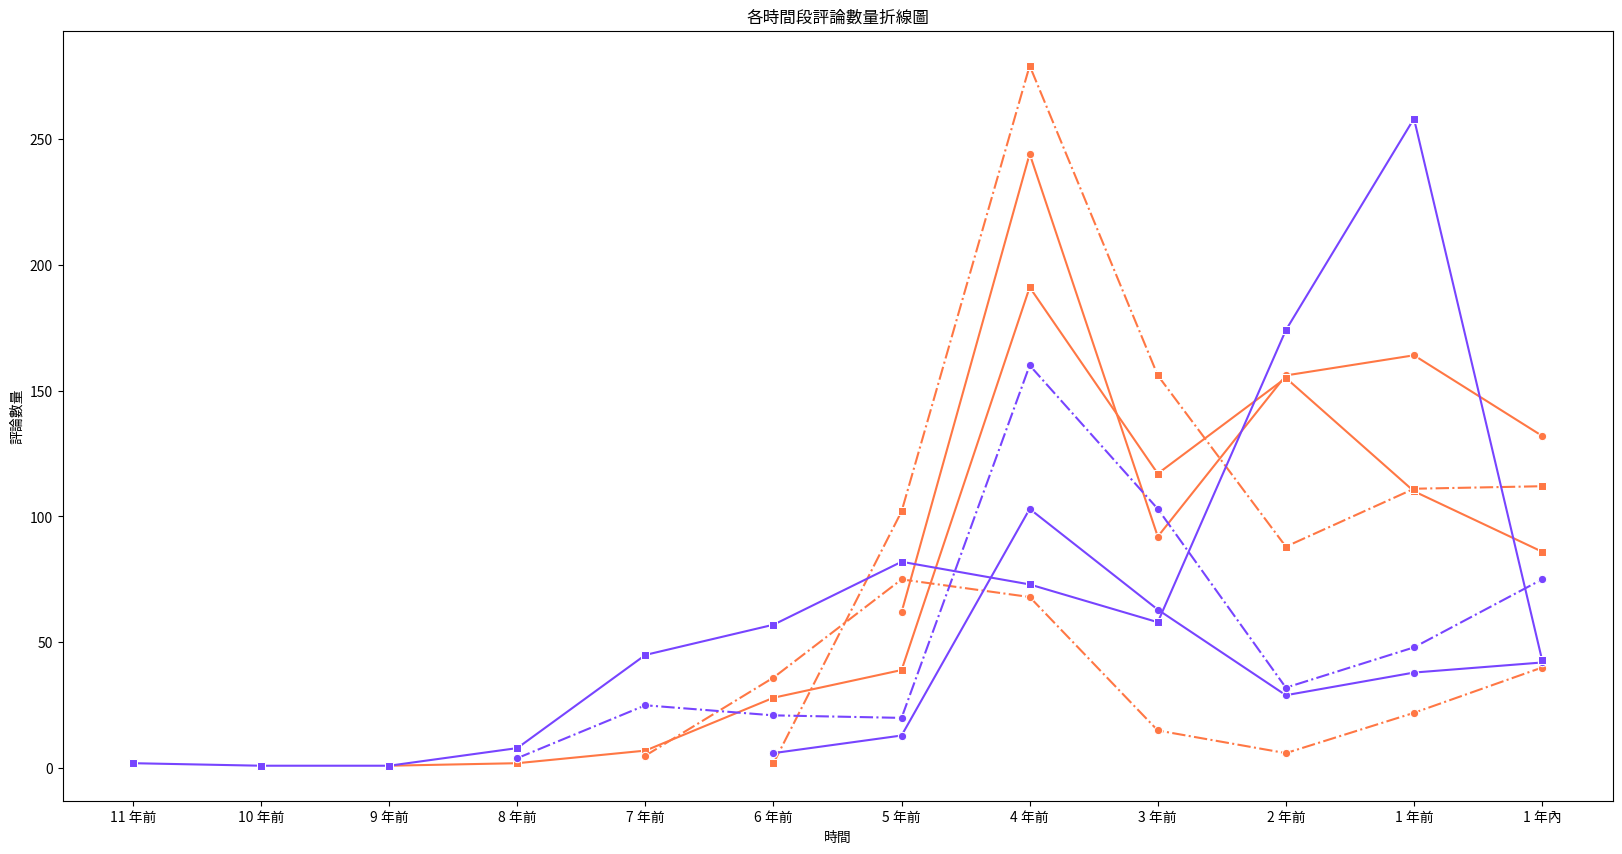

In [37]:
# 大於四年
def map_time(time):
    if '分鐘前' in time or '小時前'in time or'天前' in time or '週前' in time or '月前' in time:
        return '1 年內'
    elif '年前' in time:  
        return time
    
plt.figure(figsize=(20, 10))
# list_3 = ["0","沙崙海水浴場","櫻花道","淡水漁人碼頭長堤","滬尾砲台公園","淡水捷運公園","淡水福佑宮","馬偕上岸處"]
沙崙海水浴場_df['新時間'] = 沙崙海水浴場_df['時間'].apply(map_time)
group_1 = 沙崙海水浴場_df.groupby(by='新時間')
櫻花道_df['新時間'] = 櫻花道_df['時間'].apply(map_time)
group_2 = 櫻花道_df.groupby(by='新時間')
淡水漁人碼頭長堤_df['新時間'] = 淡水漁人碼頭長堤_df['時間'].apply(map_time)
group_3 = 淡水漁人碼頭長堤_df.groupby(by='新時間')
滬尾砲台公園_df['新時間'] = 滬尾砲台公園_df['時間'].apply(map_time)
group_4 = 滬尾砲台公園_df.groupby(by='新時間')
淡水捷運公園_df['新時間'] = 淡水捷運公園_df['時間'].apply(map_time)
group_5 = 淡水捷運公園_df.groupby(by='新時間')
淡水福佑宮_df['新時間'] = 淡水福佑宮_df['時間'].apply(map_time)
group_6 = 淡水福佑宮_df.groupby(by='新時間')
馬偕上岸處_df['新時間'] = 馬偕上岸處_df['時間'].apply(map_time)
group_7 = 馬偕上岸處_df.groupby(by='新時間')

group_1_counts = group_1.size()
Count_1_df = group_1_counts.reset_index(name='Count')
group_2_counts = group_2.size()
Count_2_df = group_2_counts.reset_index(name='Count')
group_3_counts = group_3.size()
Count_3_df = group_3_counts.reset_index(name='Count')
group_4_counts = group_4.size()
Count_4_df = group_4_counts.reset_index(name='Count')
group_5_counts = group_5.size()
Count_5_df = group_5_counts.reset_index(name='Count')
group_7_counts = group_7.size()
Count_7_df = group_7_counts.reset_index(name='Count')
# group_6的中比較複雜，10年前跟11年前
# 會讓reset.index跟1年內、1年前排在一起
group_6_counts = group_6.size()
Count_6_df = group_6_counts.reset_index(name='Count')
custom_order = ["11 年前", "10 年前","9 年前","8 年前","7 年前","6 年前","5 年前","4 年前","3 年前","2 年前","1 年前","1 年內"]
Count_6_df['新時間'] = pd.Categorical(Count_6_df['新時間'], categories=custom_order, ordered=True)
Count_6_df = Count_6_df.sort_values('新時間').reset_index(drop=True)

# 注意value要對
custom_order = ["11 年前", "10 年前","9 年前","8 年前","7 年前","6 年前","5 年前","4 年前","3 年前","2 年前","1 年前","1 年內"]

Count_1_df['新時間'] = pd.Categorical(Count_1_df['新時間'], categories=custom_order, ordered=True)
Count_2_df['新時間'] = pd.Categorical(Count_2_df['新時間'], categories=custom_order, ordered=True)
Count_3_df['新時間'] = pd.Categorical(Count_3_df['新時間'], categories=custom_order, ordered=True)
Count_4_df['新時間'] = pd.Categorical(Count_4_df['新時間'], categories=custom_order, ordered=True)
Count_5_df['新時間'] = pd.Categorical(Count_5_df['新時間'], categories=custom_order, ordered=True)
Count_6_df['新時間'] = pd.Categorical(Count_6_df['新時間'], categories=custom_order, ordered=True)
Count_7_df['新時間'] = pd.Categorical(Count_7_df['新時間'], categories=custom_order, ordered=True)
# 按照指定順序排序
Count_1_df = Count_1_df.sort_values('新時間')
Count_2_df = Count_2_df.sort_values('新時間')
Count_3_df = Count_3_df.sort_values('新時間')
Count_4_df = Count_4_df.sort_values('新時間')
Count_5_df = Count_5_df.sort_values('新時間')
Count_6_df = Count_6_df.sort_values('新時間')
Count_7_df = Count_7_df.sort_values('新時間')
# 繪製折線圖
# list_3 = ["0","沙崙海水浴場","櫻花道","淡水漁人碼頭長堤","滬尾砲台公園","淡水捷運公園","淡水福佑宮","馬偕上岸處"]
sns.lineplot(x='新時間', y='Count', data=Count_1_df, color="#FF7744", marker='o', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_2_df, color="#FF7744", marker='s', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_3_df, color="#FF7744", marker='o', linestyle='-.')
sns.lineplot(x='新時間', y='Count', data=Count_4_df, color="#FF7744", marker='s', linestyle='-.')

sns.lineplot(x='新時間', y='Count', data=Count_5_df, color="#7744FF", marker='o', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_6_df, color="#7744FF", marker='s', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_7_df, color="#7744FF", marker='o', linestyle='-.')

# 設定標題及標籤
plt.title('各時間段評論數量折線圖')
plt.xlabel('時間')
plt.ylabel('評論數量')

file_name = "折線圖-大於四年-1.jpg"
save_path = f"/Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/{file_name}"
# 保存為 JPG 格式
plt.savefig(save_path, format="jpg")
print(f"WordCloud saved at: {save_path}")

# 顯示圖表
plt.show()

/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chriskeng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

WordCloud saved at: /Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/折線圖-大於四年-2.jpg


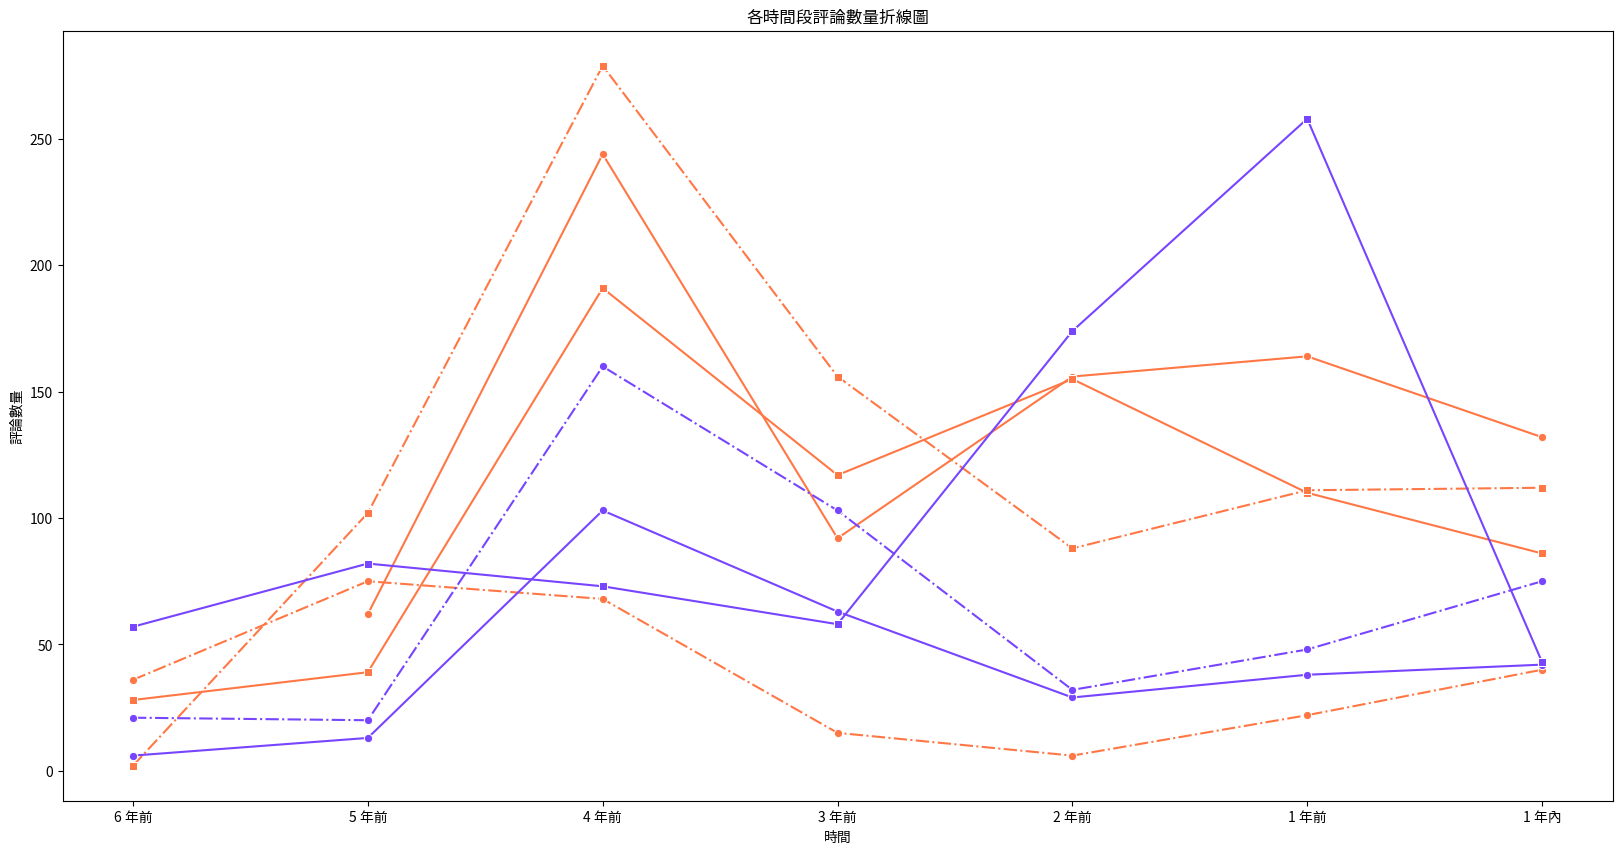

In [40]:
# 只畫0~7年
def map_time(time):
    if '分鐘前' in time or '小時前'in time or'天前' in time or '週前' in time or '月前' in time:
        return '1 年內'
    elif '1 年前' in time or '2 年前' in time or '3 年前' in time or '4 年前' in time or '5 年前' in time or '6 年前' in time:  
        return time
    else:
        return None
    
plt.figure(figsize=(20, 10))
# list_3 = ["0","沙崙海水浴場","櫻花道","淡水漁人碼頭長堤","滬尾砲台公園","淡水捷運公園","淡水福佑宮","馬偕上岸處"]
沙崙海水浴場_df['新時間'] = 沙崙海水浴場_df['時間'].apply(map_time)
group_1 = 沙崙海水浴場_df.groupby(by='新時間')
櫻花道_df['新時間'] = 櫻花道_df['時間'].apply(map_time)
group_2 = 櫻花道_df.groupby(by='新時間')
淡水漁人碼頭長堤_df['新時間'] = 淡水漁人碼頭長堤_df['時間'].apply(map_time)
group_3 = 淡水漁人碼頭長堤_df.groupby(by='新時間')
滬尾砲台公園_df['新時間'] = 滬尾砲台公園_df['時間'].apply(map_time)
group_4 = 滬尾砲台公園_df.groupby(by='新時間')
淡水捷運公園_df['新時間'] = 淡水捷運公園_df['時間'].apply(map_time)
group_5 = 淡水捷運公園_df.groupby(by='新時間')
淡水福佑宮_df['新時間'] = 淡水福佑宮_df['時間'].apply(map_time)
group_6 = 淡水福佑宮_df.groupby(by='新時間')
馬偕上岸處_df['新時間'] = 馬偕上岸處_df['時間'].apply(map_time)
group_7 = 馬偕上岸處_df.groupby(by='新時間')

group_1_counts = group_1.size()
Count_1_df = group_1_counts.reset_index(name='Count')
group_2_counts = group_2.size()
Count_2_df = group_2_counts.reset_index(name='Count')
group_3_counts = group_3.size()
Count_3_df = group_3_counts.reset_index(name='Count')
group_4_counts = group_4.size()
Count_4_df = group_4_counts.reset_index(name='Count')
group_5_counts = group_5.size()
Count_5_df = group_5_counts.reset_index(name='Count')
group_6_counts = group_6.size()
Count_6_df = group_6_counts.reset_index(name='Count')
group_7_counts = group_7.size()
Count_7_df = group_7_counts.reset_index(name='Count')

# 注意value要對
custom_order = ["7 年前","6 年前","5 年前","4 年前","3 年前","2 年前","1 年前","1 年內"]

Count_1_df['新時間'] = pd.Categorical(Count_1_df['新時間'], categories=custom_order, ordered=True)
Count_2_df['新時間'] = pd.Categorical(Count_2_df['新時間'], categories=custom_order, ordered=True)
Count_3_df['新時間'] = pd.Categorical(Count_3_df['新時間'], categories=custom_order, ordered=True)
Count_4_df['新時間'] = pd.Categorical(Count_4_df['新時間'], categories=custom_order, ordered=True)
Count_5_df['新時間'] = pd.Categorical(Count_5_df['新時間'], categories=custom_order, ordered=True)
Count_6_df['新時間'] = pd.Categorical(Count_6_df['新時間'], categories=custom_order, ordered=True)
Count_7_df['新時間'] = pd.Categorical(Count_7_df['新時間'], categories=custom_order, ordered=True)
# 按照指定順序排序
Count_1_df = Count_1_df.sort_values('新時間')
Count_2_df = Count_2_df.sort_values('新時間')
Count_3_df = Count_3_df.sort_values('新時間')
Count_4_df = Count_4_df.sort_values('新時間')
Count_5_df = Count_5_df.sort_values('新時間')
Count_6_df = Count_6_df.sort_values('新時間')
Count_7_df = Count_7_df.sort_values('新時間')
# 繪製折線圖
# list_3 = ["0","沙崙海水浴場","櫻花道","淡水漁人碼頭長堤","滬尾砲台公園","淡水捷運公園","淡水福佑宮","馬偕上岸處"]
sns.lineplot(x='新時間', y='Count', data=Count_1_df, color="#FF7744", marker='o', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_2_df, color="#FF7744", marker='s', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_3_df, color="#FF7744", marker='o', linestyle='-.')
sns.lineplot(x='新時間', y='Count', data=Count_4_df, color="#FF7744", marker='s', linestyle='-.')

sns.lineplot(x='新時間', y='Count', data=Count_5_df, color="#7744FF", marker='o', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_6_df, color="#7744FF", marker='s', linestyle='-')
sns.lineplot(x='新時間', y='Count', data=Count_7_df, color="#7744FF", marker='o', linestyle='-.')

# 設定標題及標籤
plt.title('各時間段評論數量折線圖')
plt.xlabel('時間')
plt.ylabel('評論數量')

file_name = "折線圖-大於四年-2.jpg"
save_path = f"/Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/{file_name}"
# 保存為 JPG 格式
plt.savefig(save_path, format="jpg")
print(f"WordCloud saved at: {save_path}")

# 顯示圖表
plt.show()

In [42]:
print(Count_1_df)
print(Count_2_df)
print(Count_3_df)
print(Count_4_df)
print(Count_5_df)
print(Count_6_df)
print(Count_7_df)

    新時間  Count
5  5 年前     62
4  4 年前    244
3  3 年前     92
2  2 年前    156
1  1 年前    164
0  1 年內    132
62
244
    新時間  Count
6  6 年前     28
5  5 年前     39
4  4 年前    191
3  3 年前    117
2  2 年前    155
1  1 年前    110
0  1 年內     86
    新時間  Count
6  6 年前     36
5  5 年前     75
4  4 年前     68
3  3 年前     15
2  2 年前      6
1  1 年前     22
0  1 年內     40
    新時間  Count
6  6 年前      2
5  5 年前    102
4  4 年前    279
3  3 年前    156
2  2 年前     88
1  1 年前    111
0  1 年內    112
    新時間  Count
6  6 年前      6
5  5 年前     13
4  4 年前    103
3  3 年前     63
2  2 年前     29
1  1 年前     38
0  1 年內     42
    新時間  Count
7  6 年前     57
6  5 年前     82
5  4 年前     73
4  3 年前     58
3  2 年前    174
1  1 年前    258
0  1 年內     43
2   NaN      2
    新時間  Count
6  6 年前     21
5  5 年前     20
4  4 年前    160
3  3 年前    103
2  2 年前     32
1  1 年前     48
0  1 年內     75
